## Loan Approval

##### About Dataset

#### Problem Statement

### Load Essential Python Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Load Dataset

In [2]:
df=pd.read_csv(r'E:\ML\Datasets\loan_data_set.csv')

#### Top 5 rows of Dataset

In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Checking for Null values

In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.shape

(614, 13)

In [6]:
df.isnull().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.duplicated().sum()

0

# Data Preprocessing

## Filling Nan

In [10]:
from sklearn.impute import SimpleImputer
si1=SimpleImputer(strategy='most_frequent')
df['Gender']=si1.fit_transform(df[['Gender']])
df['Married']=si1.fit_transform(df[['Married']])
df['Dependents']=si1.fit_transform(df[['Dependents']])
df['Self_Employed']=si1.fit_transform(df[['Self_Employed']])
df['Credit_History']=si1.fit_transform(df[['Credit_History']])

In [11]:
si2=SimpleImputer()
df['LoanAmount']=si2.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term']=si2.fit_transform(df[['Loan_Amount_Term']])

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### EDA

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


##### Gender Ratio

<AxesSubplot:xlabel='Gender', ylabel='count'>

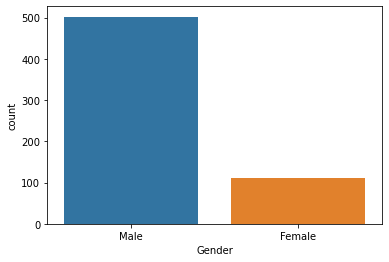

In [14]:
sns.countplot(df['Gender'])

#### Gender and Married Ratio

<AxesSubplot:xlabel='Gender', ylabel='count'>

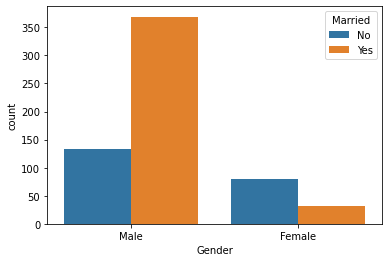

In [15]:
sns.countplot(df['Gender'],hue=df['Married'])

#### Gender and Education

<AxesSubplot:xlabel='Gender', ylabel='count'>

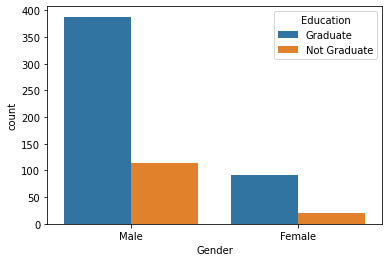

In [16]:
sns.countplot(df['Gender'],hue=df['Education'])

#### Gender and Loan Status

In [17]:
df.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              347
        N              155
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

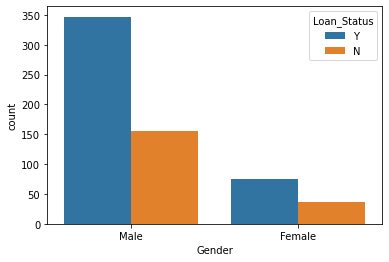

In [18]:
sns.countplot(df['Gender'],hue=df['Loan_Status'])

#### Self_Employed and Loan Stauts

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

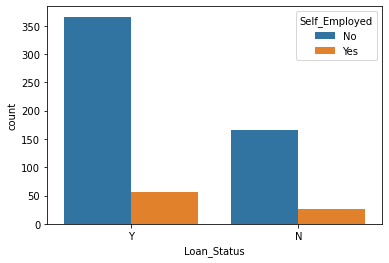

In [19]:
sns.countplot(df['Loan_Status'],hue=df['Self_Employed'])

#### Dependents and LoanStatus

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

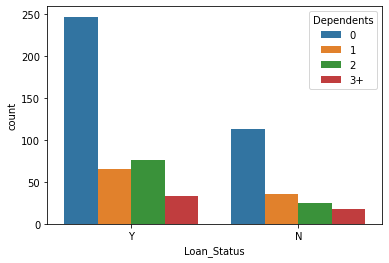

In [20]:
sns.countplot(df['Loan_Status'],hue=df['Dependents'])

#### PropertArea and Loan status

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

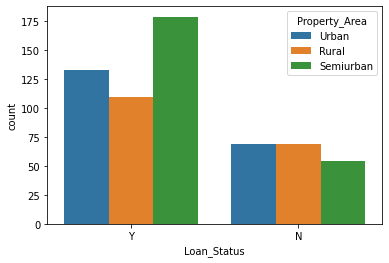

In [21]:
sns.countplot(df['Loan_Status'],hue=df['Property_Area'])

#### PropertyArea and LoanAmount

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

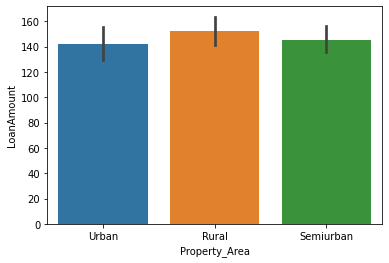

In [22]:
sns.barplot(df['Property_Area'],df['LoanAmount'])

#### How Much Applicant's income effects his loan_staus

In [23]:
df.groupby('Loan_Status')['ApplicantIncome'].max()

Loan_Status
N    81000
Y    63337
Name: ApplicantIncome, dtype: int64

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

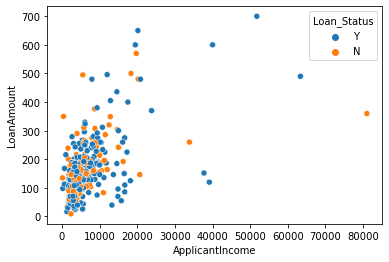

In [24]:
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'],hue=df['Loan_Status'])

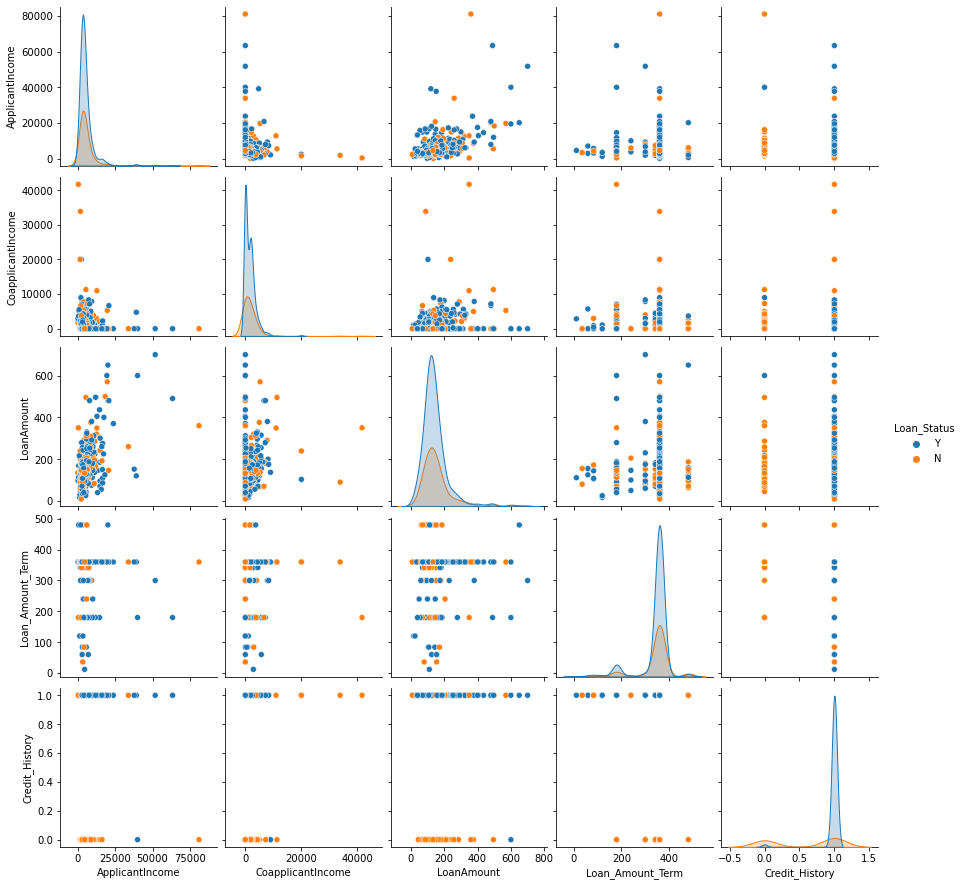

In [25]:
sns.pairplot(df,hue='Loan_Status')

<AxesSubplot:>

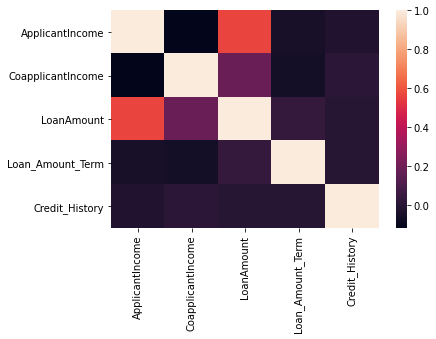

In [26]:
sns.heatmap(df.corr())

##### One Hot Encoding on classification columns

In [27]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first')
new_gmes=ohe.fit_transform(df[['Gender','Married','Education','Self_Employed']]).toarray().astype('int')

In [28]:
print(df['Property_Area'].unique())

['Urban' 'Rural' 'Semiurban']


##### Ordinal Encoding in Property_Area

In [29]:
from sklearn.preprocessing import OrdinalEncoder
oe1=OrdinalEncoder(categories=[['Rural','Semiurban','Urban']])
df['Property_Area']=oe1.fit_transform(df[['Property_Area']]).astype('int')

In [30]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
lb.fit(df['Loan_Status'])
df['Loan_Status']=lb.transform(df['Loan_Status']).astype('int')

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,2,1


In [32]:
df[['Gender','Married','Education','Self_Employed']]=new_gmes

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [34]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
df.drop(columns=['Loan_ID'],inplace=True)

In [37]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [38]:
df['Dependents'].replace('3+','3',inplace=True)

In [39]:
df.Dependents.unique()

array(['0', '1', '2', '3'], dtype=object)

#### Train and  Testing 

In [40]:
X=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [41]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [42]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

##### SCALING

In [44]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PowerTransformer
mm=MinMaxScaler()
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

### Model Building

In [45]:
model=[]
accuracyscore=[]

#### LogisticRegression

In [46]:
model.append('LogisticRegression')
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred_lr=lr.predict(xtest)

In [47]:
from sklearn.metrics import accuracy_score
accuracyscore.append(accuracy_score(ytest,ypred_lr))

#### DecisionTree

In [48]:
from sklearn.tree import DecisionTreeClassifier
model.append('DecisionTreeClassifier')
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
ypred_dtc=dtc.predict(xtest)
accuracyscore.append(accuracy_score(ytest,ypred_dtc))

#### RandomForest

In [49]:
from sklearn.ensemble import RandomForestClassifier
model.append('RandomForestClassifier')
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred_rfc=rfc.predict(xtest)
accuracyscore.append(accuracy_score(ytest,ypred_rfc))

#### KNeighbour

In [50]:
model.append('KNeighborsClassifier')
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(xtrain,ytrain)
ypred_knc=knc.predict(xtest)
accuracyscore.append(accuracy_score(ytest,ypred_knc))

#### Support Vector Machine

In [51]:
model.append('SVC')
svc=SVC()
svc.fit(xtrain,ytrain)
ypred_svc=svc.predict(xtest)
accuracyscore.append(accuracy_score(ytest,ypred_svc))

In [52]:
model

['LogisticRegression',
 'DecisionTreeClassifier',
 'RandomForestClassifier',
 'KNeighborsClassifier',
 'SVC']

In [53]:
accuracyscore

[0.7837837837837838,
 0.6972972972972973,
 0.7891891891891892,
 0.7675675675675676,
 0.7891891891891892]

In [54]:
pd.DataFrame(accuracyscore,columns=['accuracy_score'],index=model)

,accuracy_score
LogisticRegression,0.783784
DecisionTreeClassifier,0.697297
RandomForestClassifier,0.789189
KNeighborsClassifier,0.767568
SVC,0.789189


#### PIPELINE

In [55]:
df=pd.read_csv(r'E:\ML\Datasets\loan_data_set.csv')
df['Dependents'].replace('3+','3',inplace=True)

In [56]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']
y=LabelEncoder().fit_transform(y)

In [57]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=2)

In [58]:
xtrain.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
573,Male,Yes,2,Not Graduate,No,6125,1625.0,187.0,480.0,1.0,Semiurban


In [59]:
model.remove('KNeighborsClassifier')
accuracyscore=[]
cl=ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(strategy='most_frequent'),[0,1,2,4,9]),
    ('tnf2',SimpleImputer(),[7,8]),
],remainder='passthrough')
cl2=ColumnTransformer(transformers=[
    ('tnf3',OrdinalEncoder(categories=[['Rural','Semiurban','Urban']]),[10]),
    ('tnf4',OneHotEncoder(drop='first'),[0,1,3,7])
],remainder='passthrough')
trf3=ColumnTransformer([('slice',MinMaxScaler(),slice(1,10))])
trf4=LogisticRegression()

In [60]:
pipe=make_pipeline(cl,cl2,trf3,trf4)

In [61]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 4, 9]),
                                                 ('tnf2', SimpleImputer(),
                                                  [7, 8])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf3',
                                                  OrdinalEncoder(categories=[['Rural',
                                                                              'Semiurban',
                                                                              'Urban']]),
                                                  [10]),
                                                 ('tnf4',
     

In [62]:
ppredict_lr=pipe.predict(xtest)

In [63]:
accuracyscore.append(accuracy_score(ytest,ppredict_lr))

#### DecisionTreeClassifier

In [64]:
trf4=DecisionTreeClassifier()

In [65]:
pipe=make_pipeline(cl,cl2,trf3,trf4)
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 4, 9]),
                                                 ('tnf2', SimpleImputer(),
                                                  [7, 8])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf3',
                                                  OrdinalEncoder(categories=[['Rural',
                                                                              'Semiurban',
                                                                              'Urban']]),
                                                  [10]),
                                                 ('tnf4',
     

In [66]:
ppredict_dtc=pipe.predict(xtest)
accuracyscore.append(accuracy_score(ytest,ppredict_dtc))

##### RandomForestClassifier

In [67]:
trf4=RandomForestClassifier()
pipe=make_pipeline(cl,cl2,trf3,trf4)
pipe.fit(xtrain,ytrain)
ppredict_rfc=pipe.predict(xtest)
accuracyscore.append(accuracy_score(ytest,ppredict_rfc))

##### SVC

In [68]:
trf4=SVC()
pipe=make_pipeline(cl,cl2,trf3,trf4)
pipe.fit(xtrain,ytrain)
ppredict_svc=pipe.predict(xtest)
accuracyscore.append(accuracy_score(ytest,ppredict_svc))

In [72]:
pd.DataFrame(accuracyscore,columns=['accuracy_score'],index=model)

,accuracy_score
LogisticRegression,0.800000
DecisionTreeClassifier,0.659459
RandomForestClassifier,0.756757
SVC,0.800000
